# Procesamiento de imágenes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image
import os
from matplotlib import image
import cv2
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
np.set_printoptions(precision=3, suppress=True)

## Cargar Imágenes

In [ ]:
! git clone https://github.com/dvergarap13/Analisis-numero

Cloning into 'Analisis-numero'...
remote: Enumerating objects: 1969, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 1969 (delta 2), reused 7 (delta 2), pack-reused 1962
Receiving objects: 100% (1969/1969), 830.30 MiB | 20.93 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [ ]:
train= tf.keras.preprocessing.image_dataset_from_directory("train",image_size=(256, 256))

FileNotFoundError: ignored

In [ ]:
test=tf.keras.preprocessing.image_dataset_from_directory("test",image_size=(256, 256))

Found 310 files belonging to 2 classes.


In [ ]:
clases=train.class_names
clases

AttributeError: ignored

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train = train.cache().prefetch(buffer_size=AUTOTUNE)
test = test.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = tf.keras.models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1,activation="sigmoid")
])


In [ ]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [ ]:
modelo=model.fit(
  train,
  validation_data=test,
  epochs=10
)

Epoch 1/10
23/23 [==============================] - 71s 3s/step - loss: 0.8963 - accuracy: 0.5504 - val_loss: 0.6161 - val_accuracy: 0.6516
Epoch 2/10
23/23 [==============================] - 61s 3s/step - loss: 0.5653 - accuracy: 0.7157 - val_loss: 0.5800 - val_accuracy: 0.7194
Epoch 3/10
23/23 [==============================] - 61s 3s/step - loss: 0.4724 - accuracy: 0.7927 - val_loss: 0.5293 - val_accuracy: 0.7581
Epoch 4/10
23/23 [==============================] - 61s 3s/step - loss: 0.4200 - accuracy: 0.8109 - val_loss: 0.5047 - val_accuracy: 0.7806
Epoch 5/10
23/23 [==============================] - 61s 3s/step - loss: 0.3715 - accuracy: 0.8529 - val_loss: 0.4918 - val_accuracy: 0.7774
Epoch 6/10
23/23 [==============================] - 61s 3s/step - loss: 0.2771 - accuracy: 0.8978 - val_loss: 0.5107 - val_accuracy: 0.7677
Epoch 7/10
23/23 [==============================] - 62s 3s/step - loss: 0.1986 - accuracy: 0.9258 - val_loss: 0.5141 - val_accuracy: 0.8097
Epoch 8/10
23/23 [==

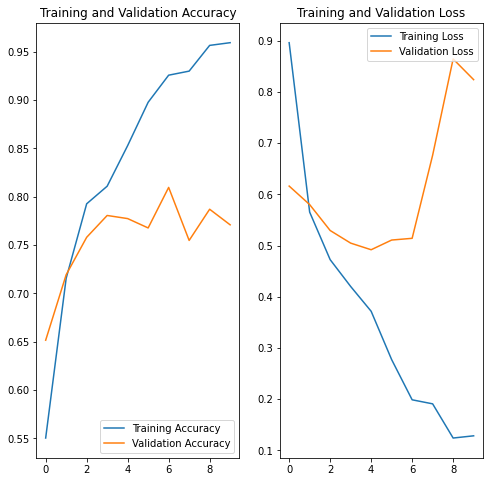

In [ ]:
acc = modelo.history['accuracy']
val_acc = modelo.history['val_accuracy']

loss = modelo.history['loss']
val_loss = modelo.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
tf.math.confusion_matrix()

(0.7577419281005859, 0.8392156720161438)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(256, 
                                                              256,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
model = tf.keras.models.Sequential([
    data_augmentation,                               
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1,activation="sigmoid")
])

In [ ]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [ ]:
modelo=model.fit(
  train,
  validation_data=test,
  epochs=15
)

Epoch 1/15
23/23 [==============================] - 68s 3s/step - loss: 0.8887 - accuracy: 0.5714 - val_loss: 0.5958 - val_accuracy: 0.7484
Epoch 2/15
23/23 [==============================] - 67s 3s/step - loss: 0.5610 - accuracy: 0.7255 - val_loss: 0.5324 - val_accuracy: 0.7806
Epoch 3/15
23/23 [==============================] - 67s 3s/step - loss: 0.5287 - accuracy: 0.7563 - val_loss: 0.5138 - val_accuracy: 0.7710
Epoch 4/15
23/23 [==============================] - 68s 3s/step - loss: 0.4810 - accuracy: 0.7815 - val_loss: 0.6733 - val_accuracy: 0.6581
Epoch 5/15
23/23 [==============================] - 67s 3s/step - loss: 0.4942 - accuracy: 0.7507 - val_loss: 0.4555 - val_accuracy: 0.8097
Epoch 6/15
23/23 [==============================] - 66s 3s/step - loss: 0.4684 - accuracy: 0.7801 - val_loss: 0.4805 - val_accuracy: 0.8161
Epoch 7/15
23/23 [==============================] - 67s 3s/step - loss: 0.4686 - accuracy: 0.7983 - val_loss: 0.4695 - val_accuracy: 0.8032
Epoch 8/15
23/23 [==

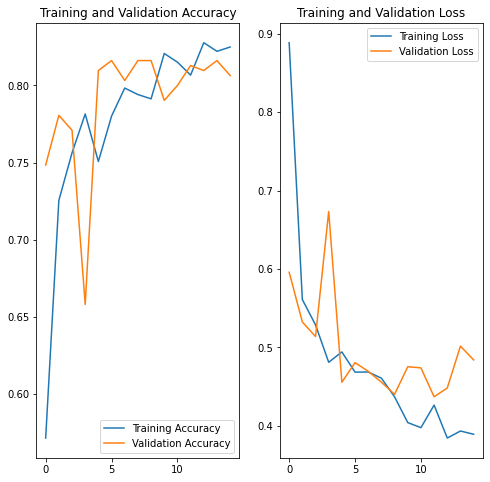

In [ ]:
acc = modelo.history['accuracy']
val_acc = modelo.history['val_accuracy']

loss = modelo.history['loss']
val_loss = modelo.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
np.mean(acc),np.mean(val_acc)

(0.7777777791023255, 0.7903225819269816)

In [ ]:
for i,j in test:
  print(j)

tf.Tensor([0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1], shape=(32,), dtype=int32)
tf.Tensor([0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1], shape=(32,), dtype=int32)
tf.Tensor([0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1], shape=(32,), dtype=int32)
tf.Tensor([0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0], shape=(22,), dty

In [ ]:
pred=np.round(predictions).astype(np.int32)
pred=tf.convert_to_tensor(pred)

In [ ]:
y=[]
for i,j in test.as_numpy_iterator():
  for a in j:
    y.append(a)

In [ ]:
y=np.array(y)
y=tf.convert_to_tensor(y)

310

In [ ]:
matriz=tf.math.confusion_matrix(y,pred)
matriz=np.array(matriz)
matriz

array([[177,  19],
       [ 41,  73]], dtype=int32)

In [ ]:
clases=["enfermo","sano"]

<Figure size 432x288 with 0 Axes>

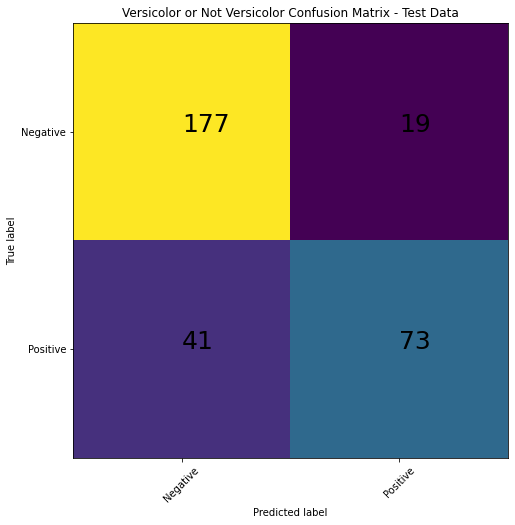

In [ ]:
plt.clf()
plt.figure(figsize=(12,8))
plt.imshow(matriz)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(matriz[i][j]),fontsize=25)
plt.show()


In [ ]:
predictions = model.predict(test)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(clases[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to enfermo_train with a 100.00 percent confidence.
